In [45]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [13]:
"""guassian_noise domain数据集在每个BN层的mean"""
with open("D:\Desktop\painting\cifar100_gaussian_all_target_mean_per_layer.pkl","rb") as  f:
    data1 = torch.load(f,map_location=torch.device("cpu"))

"""guassian_noise domain数据集在每个BN层的var"""
with open("D:\Desktop\painting\cifar100_gaussian_all_target_var_per_layer.pkl","rb") as  f:
    data2 = torch.load(f,map_location=torch.device("cpu"))

[tensor([ 6.7759e-03, -4.0760e-03, -1.0065e-02,  1.0597e-05,  1.0220e-02,
         -5.4242e-03,  7.9361e-02, -1.0396e-09, -8.4187e-02, -2.2245e-09,
          5.5926e-03, -1.4412e-09,  9.7891e-09, -1.2087e-09,  4.3641e-02,
         -1.9277e-09,  7.3749e-02,  1.8879e-09, -8.9001e-10, -8.7500e-10,
         -9.0191e-05, -1.5329e-09, -2.4842e-02, -1.9531e-03, -4.0775e-10,
         -3.1275e-02, -1.2286e-07, -8.0675e-05,  2.9541e-08, -8.3617e-03,
          4.3469e-03, -1.7124e-02, -1.7706e-02,  1.4202e-01,  2.8920e-02,
         -5.5755e-03, -2.5825e-02,  4.9859e-08,  2.1608e-02, -6.2679e-03,
          6.4703e-06,  1.1763e-03, -6.0196e-03, -1.0240e-01,  6.9023e-09,
          5.0580e-02, -5.4268e-02,  6.3776e-02, -2.4430e-06, -2.2547e-03,
         -2.0202e-09, -1.0063e-01,  1.4343e-03,  4.2177e-05,  1.6749e-01,
         -7.9676e-10, -6.7879e-03,  1.2301e-01, -2.4732e-03,  2.6398e-02,
          1.1317e-03, -4.4774e-03,  1.8185e-02, -3.5025e-06]),
 tensor([ 1.5246e-02,  8.1610e-03, -1.0018e-06,  

In [15]:
"""guassian_noise domain当前batch数据集在每个BN层的mean（通过第一层的KL散度修改所有层的mean）"""
with open("D:\Desktop\painting\cifar100_gaussian_batch_target_mean_per_layer.pkl","rb") as  f:
    data3 = torch.load(f,map_location=torch.device("cpu"))

"""guassian_noise domain当前batch数据集在每个BN层的var（通过第一层的KL散度修改所有层的var）"""
with open("D:\Desktop\painting\cifar100_gaussian_batch_target_var_per_layer.pkl","rb") as  f:
    data4 = torch.load(f,map_location=torch.device("cpu"))

[tensor([-1.1936e-03, -4.5637e-02, -2.9932e-02,  1.9507e-05,  1.8723e-02,
         -2.6649e-02,  1.4107e-01, -4.2938e-09, -6.7392e-02, -5.1526e-09,
          3.3133e-02, -3.8938e-09,  1.4005e-07, -3.5818e-09,  9.9137e-03,
         -4.8183e-09,  1.1406e-01,  5.1102e-09, -3.7099e-09, -3.2657e-09,
         -1.7269e-04, -4.2221e-09, -4.3049e-02, -1.1034e-02, -2.2671e-09,
         -3.0358e-02,  2.8397e-07, -1.4900e-04,  5.7730e-08, -1.1727e-02,
          8.8699e-03, -7.3113e-02,  4.5876e-02,  2.1204e-01, -9.5582e-02,
         -2.4165e-02,  5.9726e-02, -1.2544e-07,  2.9232e-02, -3.5016e-02,
          1.3000e-05,  1.5557e-03, -3.0186e-02, -1.0455e-01,  1.3297e-07,
          1.0255e-01, -4.2227e-02,  1.1467e-01, -5.9478e-06,  2.5043e-02,
         -6.0052e-09, -9.8539e-02, -5.3435e-03,  2.2516e-04,  1.9923e-01,
         -2.5722e-09, -6.0928e-02,  1.0712e-01, -1.7269e-02,  8.5097e-02,
          3.3772e-03, -3.6433e-03,  5.9686e-02, -7.6338e-06]),
 tensor([ 1.5222e-02,  8.0649e-03, -9.9208e-07,  

In [36]:
"""guassian_noise domain当前batch数据集在每个BN层的mean（计算每一层的KL散度分别修改所有层的mean）"""
with open("D:\Desktop\painting\cifar100_gaussian_batch_target_mean_per_layer_by_per_mom_modify.pkl","rb") as  f:
    data5 = torch.load(f,map_location=torch.device("cpu"))

"""guassian_noise domain当前batch数据集在每个BN层的var（计算每一层的KL散度分别修改所有层的var）"""
with open("D:\Desktop\painting\cifar100_gaussian_batch_target_var_per_layer_by_per_mom_modify.pkl","rb") as  f:
    data6 = torch.load(f,map_location=torch.device("cpu"))

In [41]:
dis1 = []
for idx in range(len(data1)):
    kl_distance_mean = 0.5 * F.kl_div(data1[idx].softmax(dim=-1).log(), data3[idx].softmax(dim=-1), reduction="sum") + \
                       0.5 * F.kl_div(data3[idx].softmax(dim=-1).log(), data1[idx].softmax(dim=-1), reduction="sum")
    dis1.append(kl_distance_mean.item()*1e7)
dis1

[4992.242902517319,
 2.4493783712387085,
 6.817281246185303,
 2.9336661100387573,
 3.157183527946472,
 25.4996120929718,
 51.11098289489746,
 1.1641532182693481,
 18.831342458724976,
 3.2782554626464844,
 0.782310962677002,
 19.26906406879425,
 6.249174475669861,
 5.369074642658234,
 14.16075974702835,
 31.851232051849365,
 3.2782554626464844,
 1.2898817658424377,
 29.345974326133728,
 3.67872416973114,
 4.093162715435028,
 29.50429916381836,
 22.854655981063843,
 11.192169040441513,
 17.937272787094116,
 22.836029529571533,
 28.53572368621826,
 3.236345946788788,
 10.370276868343353,
 11.944212019443512,
 0.4912726581096649]

In [42]:
dis2= []
for idx in range(len(data1)):
    kl_distance_var = 0.5 * F.kl_div(data2[idx].softmax(dim=-1).log(), data4[idx].softmax(dim=-1), reduction="sum") + \
                       0.5 * F.kl_div(data4[idx].softmax(dim=-1).log(), data2[idx].softmax(dim=-1), reduction="sum")
    dis2.append(kl_distance_var.item()*1e7)
dis2

[3506.5971314907074,
 1.7881393432617188,
 14.137476682662964,
 3.734603524208069,
 0.7450580596923828,
 7.4319541454315186,
 0.782310962677002,
 0.027939677238464355,
 2.812594175338745,
 0.7078051567077637,
 -0.01862645149230957,
 9.955838322639465,
 2.728775143623352,
 0.3632158041000366,
 4.218891263008118,
 17.14564859867096,
 0.9313225746154785,
 0.13504177331924438,
 10.235235095024109,
 1.0896474123001099,
 0.03259629011154175,
 1.8998980522155762,
 3.320164978504181,
 0.03259629011154175,
 0.6146728992462158,
 0.391155481338501,
 2.5890767574310303,
 -0.011641532182693481,
 0.09313225746154785,
 0.12107193470001221,
 0.03725290298461914]

In [55]:
dis3 = []
for idx in range(len(data1)):
    kl_distance_mean = 0.5 * F.kl_div(data1[idx].softmax(dim=-1).log(), data5[idx].softmax(dim=-1), reduction="sum") + \
                      0.5 * F.kl_div(data5[idx].softmax(dim=-1).log(), data1[idx].softmax(dim=-1), reduction="sum")
    dis3.append(kl_distance_mean.item()*1e7)
dis3

[5568.0051445961,
 0.9592622518539429,
 7.096678018569946,
 3.9767473936080933,
 1.778826117515564,
 34.62657332420349,
 53.21577191352844,
 0.9592622518539429,
 22.16547727584839,
 2.682209014892578,
 0.866129994392395,
 24.437904357910156,
 6.547197699546814,
 5.909241735935211,
 17.248094081878662,
 19.064173102378845,
 3.1478703022003174,
 1.2153759598731995,
 25.387853384017944,
 2.8498470783233643,
 3.9534643292427063,
 26.123598217964172,
 16.30745828151703,
 7.6857395470142365,
 17.087440937757492,
 16.30280166864395,
 23.478642106056213,
 2.6775524020195007,
 9.201467037200928,
 11.757947504520416,
 0.3795139491558075]

In [44]:
dis4 = []
for idx in range(len(data1)):
    kl_distance_var = 0.5 * F.kl_div(data2[idx].softmax(dim=-1).log(), data6[idx].softmax(dim=-1), reduction="sum") + \
                      0.5 * F.kl_div(data6[idx].softmax(dim=-1).log(), data2[idx].softmax(dim=-1), reduction="sum")
    dis4.append(kl_distance_var.item()*1e7)
dis4

[3870.0737059116364,
 2.0489096641540527,
 18.291175365447998,
 5.261972546577454,
 0.8475035429000854,
 9.331852197647095,
 0.9685754776000977,
 0.027939677238464355,
 3.650784492492676,
 0.6705522537231445,
 -0.009313225746154785,
 11.008232831954956,
 3.0454248189926147,
 0.35390257835388184,
 4.707835614681244,
 20.312145352363586,
 0.996515154838562,
 0.1909211277961731,
 11.967495083808899,
 1.2200325727462769,
 0.01862645149230957,
 2.253800630569458,
 3.702007234096527,
 0.011641532182693481,
 0.6379559636116028,
 0.5774199962615967,
 2.835877239704132,
 0.016298145055770874,
 0.07916241884231567,
 0.17695128917694092,
 0.020954757928848267]

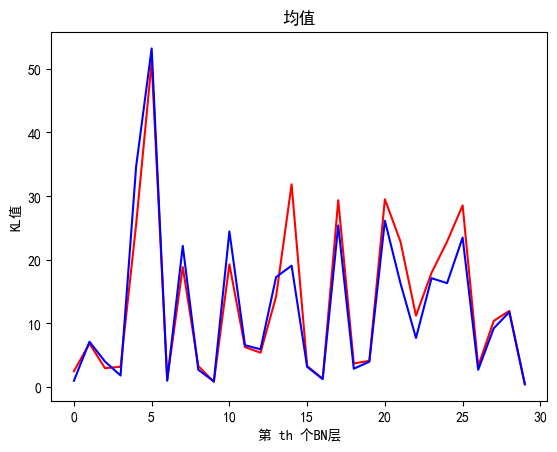

In [51]:
"""mean"""
def plot_line_chart(dis1,dis3):
    x1 = list(range(len(dis1[1:])))  # 创建x轴数据
    y1 = dis1[1:]                   # 创建y轴数据，假设data是你的列表数据
    x3 = list(range(len(dis3[1:])))  # 创建x轴数据
    y3 = dis3[1:]                   # 创建y轴数据，假设data是你的列表数据
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams["axes.unicode_minus"] = False
    plt.plot(x1, y1, color="red")             # 绘制折线图
    plt.plot(x3, y3, color="blue")             # 绘制折线图
    plt.xlabel('第 th 个BN层')          # 设置x轴标签
    plt.ylabel('KL值')          # 设置y轴标签
    plt.title('均值')        # 设置图表标题

    plt.show()                 # 显示图表
# 调用函数绘制折线图
plot_line_chart(dis1,dis3)

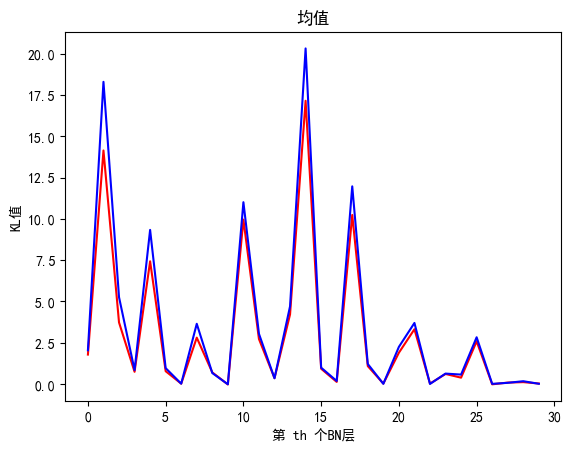

In [52]:
"""var"""
def plot_line_chart(dis2,dis4):
    x2 = list(range(len(dis2[1:])))  # 创建x轴数据
    y2 = dis2[1:]                   # 创建y轴数据，假设data是你的列表数据
    x4 = list(range(len(dis4[1:])))  # 创建x轴数据
    y4 = dis4[1:]                   # 创建y轴数据，假设data是你的列表数据
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams["axes.unicode_minus"] = False
    plt.plot(x2, y2, color="red")             # 绘制折线图
    plt.plot(x4, y4, color="blue")             # 绘制折线图
    plt.xlabel('第 th 个BN层')          # 设置x轴标签
    plt.ylabel('KL值')          # 设置y轴标签
    plt.title('方差')        # 设置图表标题

    plt.show()                 # 显示图表
# 调用函数绘制折线图
plot_line_chart(dis2,dis4)

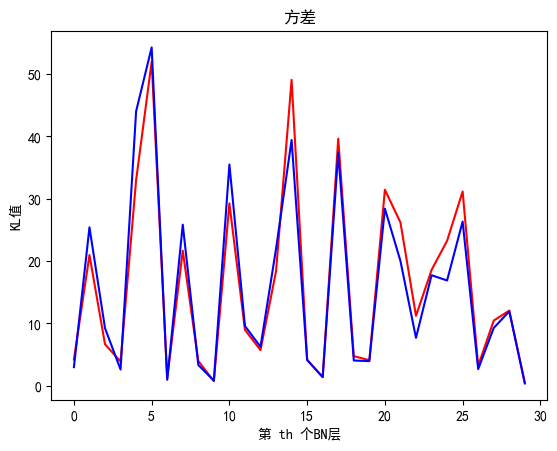

In [59]:
"""mean+var"""
def plot_line_chart(dis1,dis2,dis3,dis4):
    x = list(range(len(dis1[1:])))  # 创建x轴数据
    x_ = list(range(len(dis3[1:])))  # 创建x轴数据
    y = []
    y_ = []
    for idx in range(1,len(dis1)):
        y.append(dis1[idx] + dis2[idx])                  # 创建y轴数据，假设data是你的列表数据
        y_.append(dis3[idx] + dis4[idx])                # 创建y轴数据，假设data是你的列表数据
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams["axes.unicode_minus"] = False
    plt.plot(x, y, color="red")             # 绘制折线图
    plt.plot(x_, y_, color="blue")             # 绘制折线图
    plt.xlabel('第 th 个BN层')          # 设置x轴标签
    plt.ylabel('KL值')          # 设置y轴标签
    plt.title('方差')        # 设置图表标题

    plt.show()                 # 显示图表
# 调用函数绘制折线图
plot_line_chart(dis1,dis2,dis3,dis4)